# CH08. 의사결정나무 (DecisionTree) (실습)

### [1] 실습 진행 관련 설명
의사결정나무에 대한 실습을 진행하고자 한다. 실습은 크게 두가지로 구성되어 있다.

- sklearn 라이브러리를 이용한 방법
- 직접 함수를 구현하는 방법

처음에는 sklearn 라이브러리를 이용한 방법을 실습하고 그 이후에 직접 함수를 구현하여 이론에서 배운 엔트로피의 계산을 수행한다.


## [2] 코드 구현의 흐름


- (1) (데이터 측면) 데이터 불러오기

- (2) (데이터 측면) 데이터 시각화 및 전처리

- (3) (모델 측면) sklearn 라이브러리를 이용하여 의사결정나무 불러오기

- (4) (학습 과정) sklearn 라이브러리를 이용하여 모델 학습하기

- (5) (성능 평가) 모델 테스트 및 시각화

## (첫번째 실습) sklearn 라이브러리를 이용한 방법




In [ ]:
'''
(1) (데이터 측면) 데이터 불러오기.
train과 test 데이터가 각각 분리되어 있으므로 두 개의 파일을 모두 불러와야 한다.
해당 데이터는 공공데이터 포털에서 제공하는 서울시 구 정보를 실습을 위해 편집한 데이터로 실제 데이터이다.
district : 구 정보, latitude : 위도, longitude : 경도, label : [강북, 강서, 강동, 강남]
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree, preprocessing

train = pd.read_csv('district_dict_list.csv')
test = pd.read_csv('dong_dict_list.csv')
print(train)

           district   latitude   longitude     label
0         Dobong-gu  37.665861  127.031767   Gangbuk
1      Eunpyeong-gu  37.617612  126.922700   Gangseo
2     Dongdaemun-gu  37.583801  127.050700  Gangdong
3        Dongjak-gu  37.496504  126.944307   Gangnam
4      Geumcheon-gu  37.460097  126.900155   Gangseo
5           Guro-gu  37.495486  126.858121   Gangseo
6         Jongno-gu  37.599100  126.986149   Gangbuk
7        Gangbuk-gu  37.646995  127.014716   Gangbuk
8       Jungnang-gu  37.595379  127.093967  Gangdong
9        Gangnam-gu  37.495985  127.066409   Gangnam
10       Gangseo-gu  37.565762  126.822656   Gangseo
11          Jung-gu  37.557945  126.994190   Gangbuk
12      Gangdong-gu  37.549208  127.146482  Gangdong
13      Gwangjin-gu  37.548144  127.085753  Gangdong
14          Mapo-gu  37.562291  126.908780   Gangseo
15        Seocho-gu  37.476953  127.037810   Gangnam
16      Seongbuk-gu  37.606991  127.023218   Gangbuk
17         Nowon-gu  37.655264  127.077120   G

In [ ]:
'''
(2) (데이터 측면) 데이터 시각화 및 전처리
의사결정 나무 구현을 위해 특징 벡터 x에 위도와 경도 데이터를 저장
[강북, 강서, 강남, 강동]의 분류를 위한 정답값을 y에 저장
'''
x_train = train[['longitude', 'latitude']]
y_train = train[['label']]
x_test = test[['longitude', 'latitude']]
y_test = test[['label']]

In [ ]:
'''
(3) (모델 측면) 의사결정나무 모델 불러오기
sklearn 라이브러리를 통해 구현되어 있는 의사결정나무 모델을 불러온다.
범주형 데이터의 경우 전처리를 통해서 숫자 데이터로 변환해준다.
강북 -> 0, 강동 -> 1, 강남 -> 2, 강서 -> 3
'''
label_data = preprocessing.LabelEncoder()
y_encoded = label_data.fit_transform(y_train)
classifier = tree.DecisionTreeClassifier(criterion = 'entropy')

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
'''
(4) (학습 과정) sklearn 라이브러리를 이용하여 알고리즘 수행하기.
fit 함수를 이용해서 학습을 진행한다.
y값의 경우 새롭게 인코딩된 데이터를 활용한다.
'''
classifier.fit(x_train, y_encoded)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
'''
(5) (성능 평가) 모델 테스트.
정확도 함수를 통해서 결과를 테스트 한다.
마찬가지로 predict 함수를 활용한다.
'''
from sklearn.metrics import accuracy_score

y_pred = classifier.predict(x_test)
print("accuracy :", str(accuracy_score(y_test.values.ravel(), label_data.classes_[y_pred])))

comparison = pd.DataFrame({'예측값':label_data.classes_[y_pred],
                           '정답값':y_test.values.ravel()})
comparison

accuracy : 1.0


,예측값,정답값
0,Gangnam,Gangnam
1,Gangbuk,Gangbuk
2,Gangnam,Gangnam
3,Gangbuk,Gangbuk
4,Gangbuk,Gangbuk
5,Gangbuk,Gangbuk
6,Gangdong,Gangdong
7,Gangnam,Gangnam
8,Gangseo,Gangseo
9,Gangseo,Gangseo


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
<ipython-input-10-47be4b72af5d>:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude,
<ipython-input-10-47be4b72af5d>:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude,
<ipython-input-10-47be4b72af5d>:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude,
<ipython-input-10-47be4b72af5d>:23: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude,


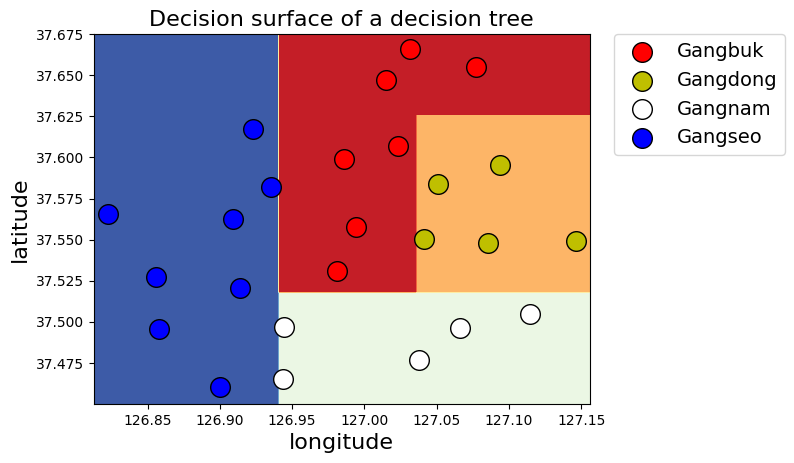

In [ ]:
'''
(5-2) (성능 평가) 모델 시각화 - scatter
코드에 대한 자세한 이해는 필요 없이 결과값만 확인하자.
'''
def display_decision_surface(clf, X, y):
  x_min = X.longitude.min() - 0.01
  x_max = X.longitude.max() + 0.01
  y_min = X.latitude.min() - 0.01
  y_max = X.latitude.max() + 0.01

  n_classes = len(label_data.classes_)
  plot_colors = 'rywb'
  plot_step = 0.001

  xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                       np.arange(y_min, y_max, plot_step))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

  for i, color in zip(range(n_classes), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X.loc[idx].longitude, X.loc[idx].latitude,
                c = color, label = label_data.classes_[i],
                cmap = plt.cm.RdYlBu, edgecolor = 'black', s=200)

  plt.title('Decision surface of a decision tree', fontsize=16)
  plt.legend(bbox_to_anchor=(1.05, 1),
             loc=2, borderaxespad=0., fontsize=14)
  plt.xlabel('longitude', fontsize=16)
  plt.ylabel('latitude', fontsize=16)
  plt.rcParams["figure.figsize"] = [7, 5]
  plt.rcParams["font.size"] = 14
  plt.rcParams["xtick.labelsize"] = 14
  plt.rcParams["ytick.labelsize"] = 14
  plt.show()
display_decision_surface(classifier, x_train, y_encoded)

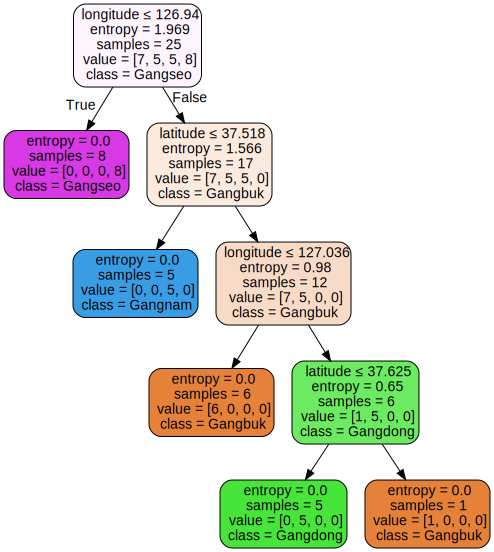

In [ ]:
'''
(5-3) (성능 평가) 모델 시각화 - graphviz
코드에 대한 자세한 이해는 필요 없이 결과값만 확인하자.
'''
import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('seoul')
dot_data = tree.export_graphviz(classifier, out_file=None,
                                feature_names=['longitude', 'latitude'],
                                class_names=['Gangbuk', 'Gangdong', 'Gangnam', 'Gangseo'],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

## (두번째 실습) 직접 함수를 구현하여 엔트로피 계산

## (직접구현) 데이터 불러오기

In [ ]:
'''
(1) (데이터 측면) 데이터 불러오기.
수업시간에 활용했던 컴퓨터 구매여부 데이터를 활용한다.
실제 손으로 연산했던 내용과 코드를 통해 연산한 결과가 잘 나오는지 확인해보자.
'''
import math

pd_data = pd.read_csv('https://raw.githubusercontent.com/AugustLONG/ML01/master/01decisiontree/AllElectronics.csv')
pd_data = pd_data.drop("RID",axis=1)
print(pd_data)

            age  income student credit_rating class_buys_computer
0         youth    high      no          fair                  no
1         youth    high      no     excellent                  no
2   middle_aged    high      no          fair                 yes
3        senior  medium      no          fair                 yes
4        senior     low     yes          fair                 yes
5        senior     low     yes     excellent                  no
6   middle_aged     low     yes     excellent                 yes
7         youth  medium      no          fair                  no
8         youth     low     yes          fair                 yes
9        senior  medium     yes          fair                 yes
10        youth  medium     yes     excellent                 yes
11  middle_aged  medium      no     excellent                 yes
12  middle_aged    high     yes          fair                 yes
13       senior  medium      no     excellent                  no


In [ ]:
'''
(2) (모델 측면) 엔트로피 구현하기.
데이터가 주어졌을 때, 컴퓨터 구매여부에 대한 엔트로피를 구하는 함수를 구현한다.
'''
def get_info(df):
    buy = df.loc[df["class_buys_computer"]=="yes"]
    not_buy = df.loc[df["class_buys_computer"]=="no"]
    x = np.array([len(buy)/len(df),len(not_buy) /len(df)])
    y = np.log2(x[x!=0])

    info_all = - sum(x[x!=0] * y)
    return info_all

get_info(pd_data)

0.9402859586706311

In [ ]:
'''
(3) 속성별 정보 이득률 구하기.
데이터의 속성을 확인해서 각각의 속성별 정보 이득률을 구하는 함수를 선언한다.
'''
def get_attribute_info(df, attribute_name):
    attribute_values = pd_data[attribute_name].unique()
    get_infos = []
    for value in attribute_values:
        split_df = pd_data.loc[pd_data[attribute_name] == value]

        get_infos.append((len(split_df) / len(df)) * get_info(split_df))

    return sum(get_infos)

get_attribute_info(pd_data, "age")

0.6935361388961918

In [ ]:
'''
(4) (모델측면) 정보이득 구하기.
나이, 수입, 학생여부, 신용등급에 대한 정보이득을 연산한다.
가장 정보이득이 큰 속성이 무엇인지 확인해보자.
'''
print(get_info(pd_data) - get_attribute_info(pd_data, "age"))
print(get_info(pd_data) - get_attribute_info(pd_data, "income"))
print(get_info(pd_data) - get_attribute_info(pd_data, "student"))
print(get_info(pd_data) - get_attribute_info(pd_data, "credit_rating"))

0.24674981977443933
0.02922256565895487
0.15183550136234159
0.04812703040826949
